In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Find features & Target

In [81]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [6]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


# Training & Testing

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

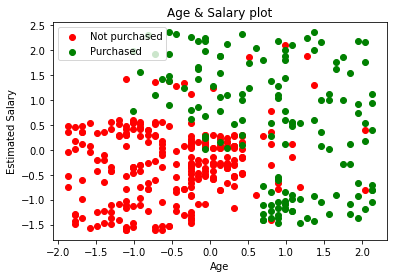

In [116]:
plt.scatter(X[y==0,0],X[y==0,1],color="red",label="Not purchased")
plt.scatter(X[y==1,0],X[y==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Age & Salary plot")
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

# Model Fitting

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",ccp_alpha=0.0072)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0072)

# Accuracy Testing

In [140]:
y_pred = dt_model.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.91

In [142]:
y_pred_train = dt_model.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.92

In [143]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  5],
       [ 4, 26]], dtype=int64)

In [144]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        70
           1       0.84      0.87      0.85        30

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.91      0.91       100



# ROC & AUC curve

In [145]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresh = roc_curve(y_test,y_pred)

In [146]:
auc = auc(fpr,tpr)
auc

0.8976190476190476

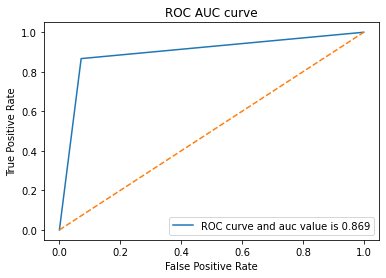

In [147]:
plt.plot(fpr,tpr,label="ROC curve and auc value is %0.3f"%acc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC curve")
plt.legend()
plt.show()

# Model Visualization

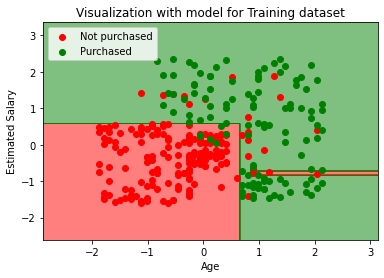

In [148]:
#Visualization for training dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, dt_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

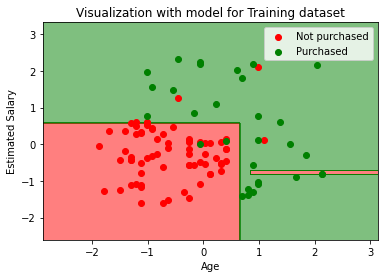

In [149]:
#Visualization for testing dataset
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, dt_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))

plt.scatter(X_set[y_set==0,0],X_set[y_set==0,1],color="red",label="Not purchased")
plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1],color="green",label="Purchased")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.title("Visualization with model for Training dataset")
plt.show()

# Tree Visualization

In [150]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.75,random_state=50)

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",ccp_alpha=0.0072)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0072)

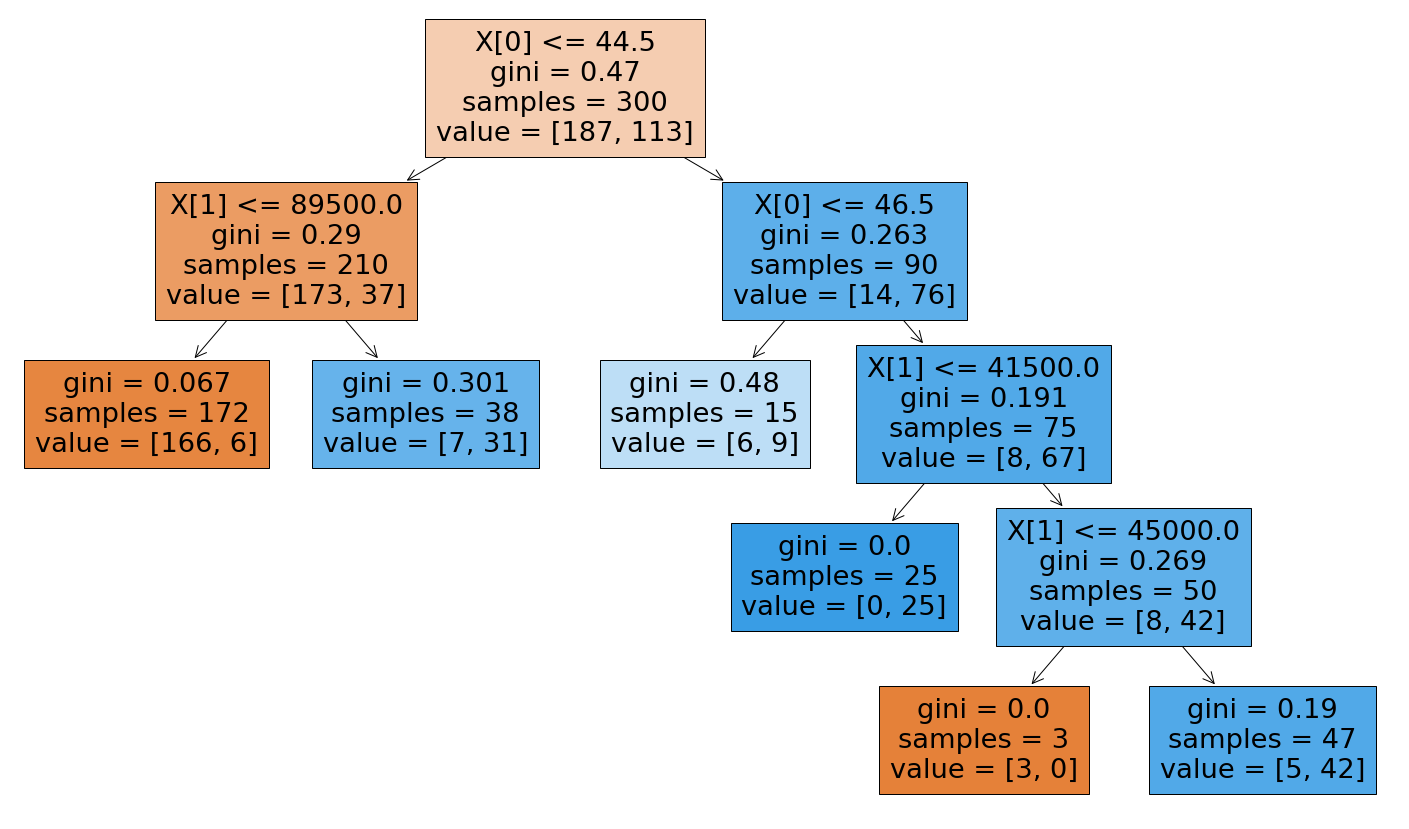

In [154]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dt_model,filled=True)

plt.show()

In [155]:
from sklearn.tree import export_text


r = export_text(dt_model, feature_names=['Age','EstimatedSalary'])

In [156]:
print(r)

|--- Age <= 44.50
|   |--- EstimatedSalary <= 89500.00
|   |   |--- class: 0
|   |--- EstimatedSalary >  89500.00
|   |   |--- class: 1
|--- Age >  44.50
|   |--- Age <= 46.50
|   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- EstimatedSalary <= 41500.00
|   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  41500.00
|   |   |   |--- EstimatedSalary <= 45000.00
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  45000.00
|   |   |   |   |--- class: 1



# Pruning concept

In [157]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impuritites = path.ccp_alphas, path.impurities

In [158]:
ccp_alphas

array([0.        , 0.00111111, 0.00111111, 0.00138889, 0.00148148,
       0.001625  , 0.00190476, 0.00208333, 0.00248457, 0.00253968,
       0.00285714, 0.00294215, 0.00296296, 0.00297619, 0.00321903,
       0.00403975, 0.00407244, 0.00455666, 0.00578571, 0.00834253,
       0.12653152, 0.18755661])

In [159]:
ccp_alphas = [0.        , 0.00111111, 0.00138889, 0.001625  , 0.00166667,
       0.00190476, 0.00194444, 0.00208333, 0.00248457, 0.00253968,
       0.00285714, 0.00294215, 0.00296296, 0.00297619, 0.00321903,
       0.00403975, 0.00407244, 0.00455666, 0.00578571, 0.00834253]

In [160]:
from sklearn.tree import DecisionTreeClassifier

acc_test = []
acc_train = []

for i in ccp_alphas:
    dt_model = DecisionTreeClassifier(criterion="gini",ccp_alpha=i)
    dt_model.fit(X_train,y_train)
    p1 = dt_model.predict(X_test)
    r1 = accuracy_score(y_test,p1)
    acc_test.append(r1)
    
    p2 = dt_model.predict(X_train)
    r2 = accuracy_score(y_train,p2)
    acc_train.append(r2)

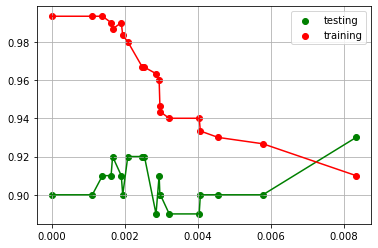

In [161]:
plt.scatter(ccp_alphas,acc_test,color="green",label="testing")
plt.plot(ccp_alphas,acc_test,color="green")

plt.scatter(ccp_alphas,acc_train,color="red",label="training")
plt.plot(ccp_alphas,acc_train,color="red")
plt.legend()
plt.grid()
plt.show()

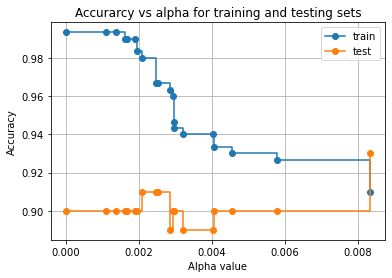

In [162]:

clfs=[]

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    

#Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]


plt.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
plt.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
plt.legend()
plt.grid()

plt.title("Accurarcy vs alpha for training and testing sets")
plt.xlabel("Alpha value")
plt.ylabel("Accuracy")
plt.show()

# User Testing

test with new user: age is 30 year old, and salary is 60000;

find out that customer have a car or not

and a function for that